<a href="https://colab.research.google.com/github/davidfague/Stylized-ReducedOrder-L5-Model/blob/main/Segment_Axial_Currents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as ss
from mpl_toolkits import mplot3d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Stylized-ReducedOrder-L5-Model/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Stylized-Cell-model


In [ ]:
output_folder = 'Detailedoutput_control'
v = h5py.File('./{}/Detailedv_report.h5'.format(output_folder),'r') #read segment voltage traces
segs = pd.read_csv('Detailedoutput_control/DetailedSegments.csv') # read segment values

f = h5py.File('./{}/ecp.h5'.format(output_folder),'r') #read ecp testing another project

In [ ]:
f.visit(print)
f.name
# data_raw = f['ecp/data'][()]

'/'

In [ ]:
#Usefull subsetting method
# print(segs[(segs.Type=='soma')]) #how to separate by type
somasegIDs = segs[(segs.Type=='soma')]['SEG ID'] #how to pull a column after separating by type

   SEG ID  BMTK ID     Seg_L   Seg_diam    X  Type  Sec ID   Distance  \
0       0        0  4.633872   9.290377  0.1  soma       0   2.316936   
1       1        0  4.633872  15.657015  0.3  soma       0   6.950809   
2       2        0  4.633872  17.526643  0.5  soma       0  11.584681   
3       3        0  4.633872  15.446328  0.7  soma       0  16.218553   
4       4        0  4.633872   9.437299  0.9  soma       0  20.852426   

   Section_L  Section_diam  Section_nseg  Section_Ra   Coord X   Coord Y  \
0  23.169362     17.526643             5       100.0 -9.249733 -0.577674   
1  23.169362     17.526643             5       100.0 -4.624868 -0.288877   
2  23.169362     17.526643             5       100.0 -0.000010  0.000021   
3  23.169362     17.526643             5       100.0  4.624854  0.288824   
4  23.169362     17.526643             5       100.0  9.249712  0.577722   

   Coord Z  ParentSegID Elec_distanceQ  
0      0.0          NaN           None  
1      0.0          0.

In [ ]:
segs.head() # visualize categories

,SEG ID,BMTK ID,Seg_L,Seg_diam,X,Type,Sec ID,Distance,Section_L,Section_diam,Section_nseg,Section_Ra,Coord X,Coord Y,Coord Z,ParentSegID
0,0,0,4.633872,9.290377,0.1,soma,0,2.316936,23.169362,17.526643,5,100.0,-9.249733,-0.577674,0.0,NaN
1,1,0,4.633872,15.657015,0.3,soma,0,6.950809,23.169362,17.526643,5,100.0,-4.624868,-0.288877,0.0,0.0
2,2,0,4.633872,17.526643,0.5,soma,0,11.584681,23.169362,17.526643,5,100.0,-0.000010,0.000021,0.0,1.0
3,3,0,4.633872,15.446328,0.7,soma,0,16.218553,23.169362,17.526643,5,100.0,4.624854,0.288824,0.0,2.0
4,4,0,4.633872,9.437299,0.9,soma,0,20.852426,23.169362,17.526643,5,100.0,9.249712,0.577722,0.0,3.0


In [ ]:
segIDs=segs['SEG ID']

# segs = segs.set_index(['Type','Sec ID']).join(segs_degrees.set_index(['Type','Sec ID'])).reset_index() #not sure what this does
segs['Sec ID'] = segs['Sec ID'].astype(int)
segs['X'] = segs['X'].astype(float)
segs['Elec_distanceQ'] = 'None'
AllSegXCoord=segs['Coord X']
AllSegYCoord=segs['Coord Y']
AllSegZCoord=segs['Coord Z']
AllSegSec_ID=segs['Sec ID']
AllSegSec_name=segs['Type']
segLs=segs["Seg_L"]
segxs=segs["X"]
segdists=segs["Distance"]
SegSecL=segs["Section_L"]
segdiams=segs["Seg_diam"]
SegSecnseg=segs["Section_nseg"]
secRas=segs["Section_Ra"]
psegIDs=segs["ParentSegID"]
secids=segs["Sec ID"]
bmtkid=segs["BMTK ID"]

psegids=[]
for i in range(len(psegIDs)):
  if np.isnan(psegIDs[i]) == False:
    psegids.append(int(psegIDs[i]))
  else:
    psegids.append(psegIDs[i])

In [ ]:
print(psegids)

[nan, 0, 1, 2, 3, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 12, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 44, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 9, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 2, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 137, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 134, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 161, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 156, 218, 219, 220, 221

In [ ]:
class childseg():
  def __init__(self,seg,sectionindex,sectionname,color,XCoord,YCoord,ZCoord,secRa,segdiam,segx,segdist,sectionL,sectionNseg,segL,seg_v):
    self.seg=seg
    self.sectionindex=sectionindex
    self.sectionname=sectionname
    self.color=color
    self.XCoord=XCoord
    self.YCoord=YCoord
    self.ZCoord=ZCoord
    self.secRa=secRa
    self.segdiam=segdiam
    self.x=segx
    self.segdist=segdist
    self.secL=sectionL
    self.secnseg=sectionNseg
    self.segL=segL
    self.seg_v=seg_v
    self.name='sec:'+str(self.sectionname)+str(self.sectionindex)+' seg:'+str(self.seg)

In [ ]:
print(len(segIDs)) # number of segments

2526


In [ ]:
seginterest=[1685,1686,1900] #choose segments indexes to probe
colors=['blue','purple','orange'] #specify colorchoose colors

In [ ]:
probes=[]
j=0 #index color list
class probe():
  def __init__(self,seg,sectionindex,sectionname,color,XCoord,YCoord,ZCoord,secRa,segdiam,segx,segdist,sectionL,sectionNseg,segL,seg_v,parentseg):
    self.seg=seg
    self.sectionindex=sectionindex
    self.sectionname=sectionname
    self.color=color
    self.XCoord=XCoord
    self.YCoord=YCoord
    self.ZCoord=ZCoord
    self.secRa=secRa
    self.segdiam=segdiam
    self.x=segx
    self.segdist=segdist
    self.secL=sectionL
    self.secnseg=sectionNseg
    self.segL=segL
    self.seg_v=seg_v
    self.name='sec:'+str(self.sectionname)+str(self.sectionindex)+' seg:'+str(self.seg)
    self.adjprobes=[]
    self.parentprobe=[]
    self.childprobes=[]
    self.axialcurrents=[]
    self.parentaxialcurrent=[]
    self.childrenaxialcurrents=[]
    self.halfsegRa=.01*self.secRa*(self.secL/2/self.secnseg)/(np.pi*(self.segdiam/2)**2)
    self.parentseg=parentseg

    # try:
    #   self.axial_current=[Record_Axial_Current(section,single_seg=True)]
    # except:
    #   print(section)
for i in range(len(segIDs)):
  try:
    newprobe=probe(seg=i,sectionindex=AllSegSec_ID[i],sectionname=str(AllSegSec_name[i]),color=colors[j],XCoord=AllSegXCoord[i],YCoord=AllSegYCoord[i],ZCoord=AllSegZCoord[i],
                  secRa=secRas[i],segdiam=segdiams[i],segx=segxs[i],segdist=segdists[i],sectionL=SegSecL[i],sectionNseg=SegSecnseg[i],segL=segLs[i],
                  seg_v=v['report']['biophysical']['data'][:,i],parentseg=psegids[i])
  except: #use red if colors isn't long enough
        newprobe=probe(seg=i,sectionindex=AllSegSec_ID[i],sectionname=str(AllSegSec_name[i]),color='r',XCoord=AllSegXCoord[i],YCoord=AllSegYCoord[i],ZCoord=AllSegZCoord[i],
                secRa=secRas[i],segdiam=segdiams[i],segx=segxs[i],segdist=segdists[i],sectionL=SegSecL[i],sectionNseg=SegSecnseg[i],segL=segLs[i],
                seg_v=v['report']['biophysical']['data'][:,i],parentseg=psegids[i])
  j+=1 #index color list
  probes.append(newprobe)

In [ ]:
print(psegids)

[nan, 0, 1, 2, 3, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 12, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 44, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 9, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 2, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 137, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 134, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 161, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 156, 218, 219, 220, 221

In [ ]:
# psegs=[] #list of segment ids for a section's parentseg(), which is the segment that the section is attached to
# parentsegs=list(set(psegids)) # remove duplicates of the list of segment parentsegmentIDs
# # print(parentsegs)
# for j in range(len(segIDs)):
#   for i in range(len(parentsegs)):
#     if np.isnan(parentsegs[i]) == False: #remove nan
#       psegs.append(int(parentsegs[i])) #convert to integer again
#     # else: #if nan, then this segment is really the first segment
#     psegs.append(int())
# # print('psegs:',psegs)

firstsegs = [] #list of segment indices for each section's first segment
sections=[] #list of already seen section ids

for i in range(len(bmtkid)):
    if bmtkid[i] not in sections: #make sure secid is unique
      sections.append(bmtkid[i]) #add unique secid to list of already seen secids
      firstsegs.append(segIDs[i]) #get a list of first segment by unique section id

print('firstsegs:',firstsegs)

firstsegs: [0, 5, 10, 13, 44, 45, 64, 103, 130, 135, 138, 141, 156, 157, 162, 191, 218, 227, 230, 231, 238, 243, 244, 249, 258, 259, 262, 267, 274, 287, 322, 327, 332, 351, 370, 387, 390, 421, 432, 447, 460, 479, 498, 505, 508, 513, 530, 559, 560, 561, 572, 575, 576, 587, 588, 593, 614, 615, 626, 629, 654, 685, 702, 719, 740, 745, 750, 755, 782, 803, 814, 835, 870, 875, 914, 917, 940, 945, 958, 967, 976, 979, 992, 997, 1024, 1027, 1036, 1049, 1054, 1063, 1064, 1065, 1068, 1073, 1082, 1113, 1130, 1131, 1154, 1185, 1198, 1201, 1204, 1239, 1260, 1293, 1302, 1307, 1314, 1319, 1324, 1331, 1334, 1335, 1338, 1353, 1368, 1371, 1372, 1397, 1410, 1431, 1480, 1535, 1552, 1561, 1602, 1603, 1612, 1617, 1634, 1649, 1654, 1655, 1658, 1683, 1696, 1739, 1762, 1801, 1802, 1803, 1806, 1809, 1812, 1813, 1860, 1895, 1902, 1935, 1956, 1959, 1964, 2003, 2022, 2051, 2060, 2071, 2078, 2091, 2098, 2113, 2140, 2169, 2192, 2207, 2212, 2215, 2222, 2237, 2246, 2263, 2280, 2311, 2312, 2321, 2322, 2325, 2330, 2351, 2

Below code is being adjusted to only probe parentsegments, and 

In [ ]:
#getting adjacent probes using parent segmemt IDs
for i in range(len(psegids)): #iterate through segment index
  if np.isnan(psegids[i]) == False:
    for seg in segIDs: #check segIDs
      if psegids[i]==seg: #find parent seg from parent seg id
        probes[seg].adjprobes.append(probes[i]) #add child probe to probe's adjprobe list
        probes[seg].childprobes.append(probes[i]) #add child probe to probe's childprobe list

In [ ]:
for i in range(len(segIDs)):
  if np.isnan(psegids[i]) == False:
    probes[i].adjprobes.append(probes[int(psegids[i])]) #add parent seg probe to adj probes
    probes[i].parentprobe.append(probes[int(psegids[i])]) #add parent seg probe to parent probes

In [ ]:
#compute axial currents between probes
for probe in probes:
  for adjprobe in probe.adjprobes:
    axc=(probe.seg_v-adjprobe.seg_v)/(probe.halfsegRa+adjprobe.halfsegRa) #compute axial current using (v_in-v_out)/(halfsegRa+halfsegRa)
    probe.axialcurrents.append(axc)
    if [adjprobe] == probe.parentprobe:
      probe.parentaxialcurrent.append(axc)
    elif adjprobe in probe.childprobes:
      probe.childrenaxialcurrents.append(axc)

In [ ]:
for i in range(len(probes)):
  print(probes[i].adjprobes)

[<__main__.probe object at 0x7f3d392db3d0>, <__main__.probe object at 0x7f3d3a5dde90>]
[<__main__.probe object at 0x7f3d392db4d0>, <__main__.probe object at 0x7f3d392db7d0>, <__main__.probe object at 0x7f3d39298610>, <__main__.probe object at 0x7f3d39243750>, <__main__.probe object at 0x7f3d391abfd0>, <__main__.probe object at 0x7f3d391c8610>, <__main__.probe object at 0x7f3d39129d50>, <__main__.probe object at 0x7f3d3909e150>, <__main__.probe object at 0x7f3d3909e590>, <__main__.probe object at 0x7f3d390aced0>, <__main__.probe object at 0x7f3d38e8ecd0>, <__main__.probe object at 0x7f3d392db490>]
[<__main__.probe object at 0x7f3d392db590>, <__main__.probe object at 0x7f3d392db3d0>]
[<__main__.probe object at 0x7f3d392db710>, <__main__.probe object at 0x7f3d392db3d0>]
[<__main__.probe object at 0x7f3d392db810>, <__main__.probe object at 0x7f3d392db7d0>]
[<__main__.probe object at 0x7f3d392db8d0>, <__main__.probe object at 0x7f3d392db710>]
[<__main__.probe object at 0x7f3d392db650>, <__m

In [ ]:
s=807
print(probes[s].parentprobe)
print(probes[s].adjprobes)
print(probes[s].childprobes)
print(probes[s].parentaxialcurrent)
print(probes[s].axialcurrents)
print(probes[s].childrenaxialcurrents)

[<__main__.probe object at 0x7f3d39146a10>, <__main__.probe object at 0x7f3d39146fd0>]
[array([ 5.65920133e-07, -1.50480730e-06,  4.73886809e-03, ...,
        9.75568429e-02,  9.84405323e-02,  9.93629366e-02])]
[array([-4.65429140e-07,  1.18800104e-06, -5.67319664e-03, ...,
       -9.61003265e-02, -9.69520532e-02, -9.78330907e-02]), array([ 5.65920133e-07, -1.50480730e-06,  4.73886809e-03, ...,
        9.75568429e-02,  9.84405323e-02,  9.93629366e-02])]
[array([-4.65429140e-07,  1.18800104e-06, -5.67319664e-03, ...,
       -9.61003265e-02, -9.69520532e-02, -9.78330907e-02])]


In [ ]:
print(len(probes))
print(len(segIDs))
print(len(psegids))

2526
2526
2526


In [ ]:
#check adjprobes lists
# for i in range(len(probes)):
#   print(probes[i].adjprobes)

blue


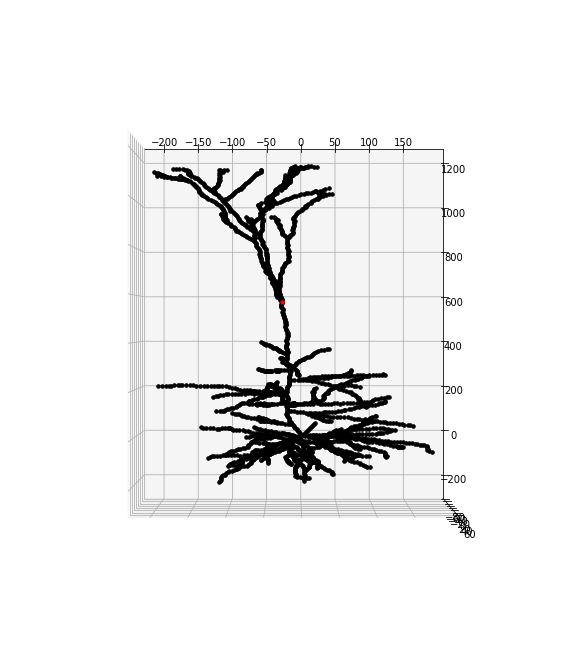

In [ ]:
elev=90 
azim=-90 #20
figsize=(10,12)
# apicsegs=segs[(segs.Type=='apic')]['segmentID']
#create 3d axes
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection='3d')
ax.plot3D(AllSegXCoord, AllSegYCoord,AllSegZCoord,'.',color='k',markersize=7)
# for i in range(len(AllSegXCoord)):
#   ax.scatter(AllSegXCoord[i], AllSegYCoord[i],AllSegZCoord[i],'.',color='k')
# import pdb;pdb.set_trace()
print(probes[0].color)
# for i in range(len(probes)):
ax.scatter(xs=AllSegXCoord[probes[firstsegs[-61]].parentprobe[0].seg],
        ys=AllSegYCoord[probes[firstsegs[-61]].parentprobe[0].seg],
        zs=AllSegZCoord[probes[firstsegs[-61]].parentprobe[0].seg],
        marker='*',color=probes[probes[firstsegs[-61]].parentprobe[0].seg].color)
plt.savefig('Probe Locations.png')
# ax.auto_scale_xyz(*box.T)
ax.view_init(elev,azim)
plt.show()

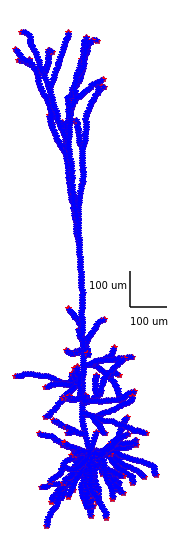

In [ ]:
plt.figure(figsize=(3,10))
ax = plt.plot(AllSegXCoord, AllSegYCoord,'.',color='k',markersize=6)
plt.vlines(110,400,500)
plt.text(0,450,'100 um')
plt.hlines(400,110,210)
plt.text(110,350,'100 um')
plt.xticks([])
plt.yticks([])
plt.box(False)

for i in range(len(probes)):
  plt.plot(AllSegXCoord[probes[i].seg],
         AllSegYCoord[probes[i].seg],
         '*',color=probes[i].color)
  for j in range(len(probes[i].adjprobes)):
      plt.plot(AllSegXCoord[probes[i].adjprobes[j].seg],
          AllSegYCoord[probes[i].adjprobes[j].seg],
          '*',color='blue')
# for i in range(len(probes)):
#   plt.plot(AllSegXCoord[probes[i].seg],
#          AllSegYCoord[probes[i].seg],
#          '*',color=probes[i].color)
plt.savefig('Probe Locations.png')

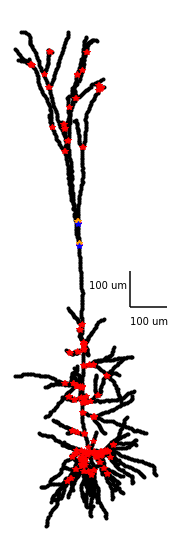

In [ ]:
plt.figure(figsize=(3,10))
ax = plt.plot(AllSegXCoord, AllSegYCoord,'.',color='k',markersize=6)
plt.vlines(110,400,500)
plt.text(0,450,'100 um')
plt.hlines(400,110,210)
plt.text(110,350,'100 um')
plt.xticks([])
plt.yticks([])
plt.box(False)

for i in firstsegs:
  plt.plot(AllSegXCoord[probes[i].seg],
         AllSegYCoord[probes[i].seg],
         '*',color=probes[i].color)
  # for j in range(len(probes[i].adjprobes)):
  #     plt.plot(AllSegXCoord[probes[i].adjprobes[j].seg],
  #         AllSegYCoord[probes[i].adjprobes[j].seg],
  #         '*',color='blue')

nexus=[probes[firstsegs[-51]].parentprobe[0].seg,probes[firstsegs[-61]].parentprobe[0].seg] #check parentseg()'s
# adjp=[0] #indexes childprobes of nexus probes to find the adjacent
for i in nexus:
  plt.plot(AllSegXCoord[probes[i].seg],
         AllSegYCoord[probes[i].seg],
         '*',color='m')
  # see all adj probes
  # for j in range(len(probes[].adjprobes)):
  #   plt.plot(AllSegXCoord[probes[].adjprobes[j].seg],
  #       AllSegYCoord[probes[psegs[i]].adjprobes[j].seg],
  #       '*',color='blue')
#see child probes
  for j in range(len(probes[i].childprobes)):
      plt.plot(AllSegXCoord[probes[i].childprobes[j].seg],
          AllSegYCoord[probes[i].childprobes[j].seg],
          '*',color='orange')
#see parent probes      
  for j in range(len(probes[i].parentprobe)):
      plt.plot(AllSegXCoord[probes[i].parentprobe[j].seg],
          AllSegYCoord[probes[i].parentprobe[j].seg],
          '*',color='blue')

In [ ]:
probes[firstsegs[-61]].parentprobe[0].seg

1479

In [ ]:
# print(psegids[1474])

seg: 0 adjprobes: 1
seg: 1698 adjprobes: 2


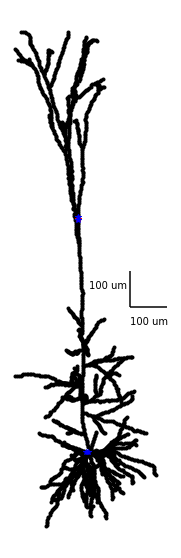

In [ ]:
nexusandsoma=[0,int(psegids[int(psegids[1700])])]
plt.figure(figsize=(3,10))
ax = plt.plot(AllSegXCoord, AllSegYCoord,'.',color='k',markersize=6)
plt.vlines(110,400,500)
plt.text(0,450,'100 um')
plt.hlines(400,110,210)
plt.text(110,350,'100 um')
plt.xticks([])
plt.yticks([])
plt.box(False)

for i in nexusandsoma:
  plt.plot(AllSegXCoord[probes[i].seg],
         AllSegYCoord[probes[i].seg],
         '*',color=probes[i].color)
  for j in range(len(probes[i].adjprobes)):
      plt.plot(AllSegXCoord[probes[i].adjprobes[j].seg],
          AllSegYCoord[probes[i].adjprobes[j].seg],
          '*',color='blue')
      
for i in nexusandsoma:
  print('seg:',probes[i].seg,'adjprobes:',len(probes[i].adjprobes))

In [ ]:
for i in range(len(probes[nexusandsoma[1]].childprobes)):
  print(probes[nexusandsoma[1]].childprobes[i].seg)

1699


In [ ]:
M=10
for i in range(M):
  print(psegids[nexusandsoma[1]-M+i:nexusandsoma[1]-M+i+1]) #print previous M values
print('nexusseg is:',nexusandsoma[1]) # indicate the segment
for i in range(M):
  print(psegids[nexusandsoma[1]+i:nexusandsoma[1]+i+1]) # print next M values

print('***')
print(psegids[nexusandsoma[1]-10:nexusandsoma[1]+10])

[1687]
[1688]
[1689]
[1690]
[1691]
[1692]
[1693]
[1694]
[1695]
[1696]
nexusseg is: 1698
[1697]
[1698]
[1699]
[1700]
[1701]
[1702]
[1703]
[1704]
[1705]
[1706]
***
[1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706]


Try to adjust Probes indices until they are adjacent, at key points.

In [ ]:
seg_v=v['report']['biophysical']['data'][:,0] # get segment 0 voltage trace
print(len(seg_v)) #should be equivalnt to (tstop=1000ms)/(dt=0.1ms)=10000

10000


In [ ]:
# class axc():
#   def __init__(self,name,i,color):
#     self.name=name
#     self.current=i
#     self.color=color

# axialcurrents=[]
# parentprobes=[]
# parentprobe=probes[0]  #parent segment probe #blue
# adjprobes=[probes[1],probes[2]] # array that should denote probes for child segments of the parent segment probe #purple, orange

# parentaxr=.01*parentprobe.secRa*(parentprobe.secL/2/parentprobe.secnseg)/(np.pi*(parentprobe.segdiam/2)**2) #compute half segment axial resistance
# for adjprobe in adjprobes:
#   adjprobeaxr=.01*adjprobe.secRa*(adjprobe.secL/2/adjprobe.secnseg)/(np.pi*(adjprobe.segdiam/2)**2) #compute half segment axial resistance
#   axialcurrent=(parentprobe.seg_v-adjprobe.seg_v)/(parentaxr+adjprobeaxr) #compute axial current using (v_in-v_out)/(halfsegRa+halfsegRa)
#   # axial_current=axc(name=adjprobe.name,i=axialcurrent,color=adjprobe.color)
#   # axialcurrents.append(axial_current)
#   adjprobe.axialcurrent=axialcurrent

# parentprobe.adjprobes=adjprobes
# parentprobe.axialcurrents=axialcurrents
# parentprobes.append(parentprobe)

In [ ]:
tstop=1000
dt=0.1
t=np.arange(0,tstop,dt)
def get_probe(probe):
  name=probe.name
  segment=probe.seg
  color=probe.color
  axialcurrents=probe.axialcurrents
  childrenaxialcurrents=probe.childrenaxialcurrents
  parentaxialcurrent=probe.parentaxialcurrent
  adjprobes=probe.adjprobes
  parentprobe=probe.parentprobe
  childprobes=probe.childprobes
  return name,segment,color,axialcurrents,childrenaxialcurrents,parentaxialcurrent,adjprobes,parentprobe,childprobes

def plot_axial_current(probe):
  name,segment,color,axialcurrents,childrenaxialcurrents,parentaxialcurrent,adjprobes,parentprobe,childprobes=get_probe(probe)
  title=name+' Axial Current'
  plt.figure(figsize=(12.8, 4.8))
  # for i,AC in enumerate(axial_current):
  for c in range(len(parentaxialcurrent)):
      # plt.plot(t,ac[dend_type].ravel(),label=dend_type)
      plt.plot(t,parentaxialcurrent[c],label=parentprobe[c].name,color='purple')
  for c in range(len(childrenaxialcurrents)):
      plt.plot(t,childrenaxialcurrents[c],label=childprobes[c].name,color='cyan')
  plt.ylabel('nA')
  plt.legend()
  plt.title(title)
  plt.xlabel('time (ms)')
  plt.show()

def plot_sum_child_axial_current(probe):
  name,segment,color,axialcurrents,childrenaxialcurrents,parentaxialcurrent,adjprobes,parentprobe,childprobes=get_probe(probe)
  title=name+' Axial Current'
  plt.figure(figsize=(12.8, 4.8))
  # for i,AC in enumerate(axial_current):
  for c in range(len(parentaxialcurrent)):
      # plt.plot(t,ac[dend_type].ravel(),label=dend_type)
      plt.plot(t,parentaxialcurrent[c],label=parentprobe[c].name,color='purple')
  axc=np.zeros(len(childrenaxialcurrents[0]))
  for c in range(len(childrenaxialcurrents)):
    axc+=childrenaxialcurrents[c] #sum the children axial currents
  for c in range(len(childrenaxialcurrents)):
      plt.plot(t,axc,label=childprobes[c].name,color='cyan')
  plt.ylabel('nA')
  plt.legend()
  plt.title(title)
  plt.xlabel('time (ms)')
  plt.show()

def sumcurrents(currents):
  current=np.zeros(len(currents[0]))
  for i in range(len(currents)):
    current+=currents[i]
  return current

def sumcurrentsfromprobes(probes):
  probesaxc=np.zeros(len(probes[0].axialcurrents[0]))
  for i in range(len(probes)):
    axc=sumcurrents(probes[i].axialcurrents)
    probesaxc+=axc
  return probesaxc
  

def getsummedprobenames(probe,arg):
  name=''
  if arg == 'adjprobes':
    for i in range(len(probe.adjprobes)):
      name+=(' '+probe.adjprobes[i].name)
    print(name)
  elif arg == 'childprobes':
    for i in range(len(probe.childprobes)):
      name+=(' '+probe.childprobes[i].name)
    print(name)
  elif arg == 'parentprobe':
    for i in range(len(probe.parentprobe)):
      name+=(' '+probe.parentprobe[i].name)
  return name


def plot_net_axial_current(probe,title=None):
  name,segment,color,axialcurrents,childrenaxialcurrents,parentaxialcurrent,adjprobes,parentprobe,childprobes=get_probe(probe)
  if title==None:
    title=name+' Net Axial Current'
  else:
    title=title+' Net Axial Current'
  plt.figure(figsize=(12.8, 4.8))
  # for i,AC in enumerate(axial_current):
  # for c in range(len(parentaxialcurrent)):
  #     # plt.plot(t,ac[dend_type].ravel(),label=dend_type)
  #     plt.plot(t,parentaxialcurrent[c],label=parentprobe[c].name,color='purple')
  axc=sumcurrents(axialcurrents)
  label=getsummedprobenames(probe,'adjprobes')
  plt.plot(t,axc,label=label,color='red')

  plt.ylabel('nA')
  plt.legend()
  plt.title(title)
  plt.xlabel('time (ms)')
  plt.show()

def plot_net_axial_currentmultiprobe(probes,title=None):
  # name,segment,color,axialcurrents,childrenaxialcurrents,parentaxialcurrent,adjprobes,parentprobe,childprobes=get_probe(probe)
  if title==None:
    title=name+' Net Axial Current'
  else:
    title=title+' Net Axial Current'
  plt.figure(figsize=(12.8, 4.8))
  # for i,AC in enumerate(axial_current):
  # for c in range(len(parentaxialcurrent)):
  #     # plt.plot(t,ac[dend_type].ravel(),label=dend_type)
  #     plt.plot(t,parentaxialcurrent[c],label=parentprobe[c].name,color='purple')
  axc=sumcurrentsfromprobes(probes)
  label=''
  # for i in range(len(probes)):
  #   label+=getsummedprobenames(probes[i],'adjprobes')
  plt.plot(t,axc,label=label,color='red')

  plt.ylabel('nA')
  plt.legend()
  plt.title(title)
  plt.xlabel('time (ms)')
  plt.show()

In [ ]:
nexus=[probes[probes[firstsegs[-61]].parentprobe[0].seg]] #select nexus probe
soma=[]
for i in somasegIDs:
  soma.append(probes[i])
# soma=[probes[0:5]] #select soma probes
print(soma)
print(nexus)

[<__main__.probe object at 0x7f3d3a5dde90>, <__main__.probe object at 0x7f3d392db490>, <__main__.probe object at 0x7f3d392db3d0>, <__main__.probe object at 0x7f3d392db4d0>, <__main__.probe object at 0x7f3d392db590>]


 sec:apic37 seg:1480 sec:apic50 seg:1683 sec:apic36 seg:1478


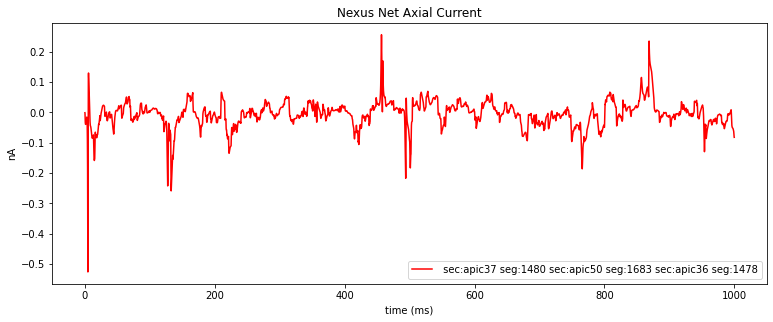

In [ ]:
for probe in nexus:
  # import pdb; pdb.set_trace()
  plot_net_axial_current(probe, 'Nexus')

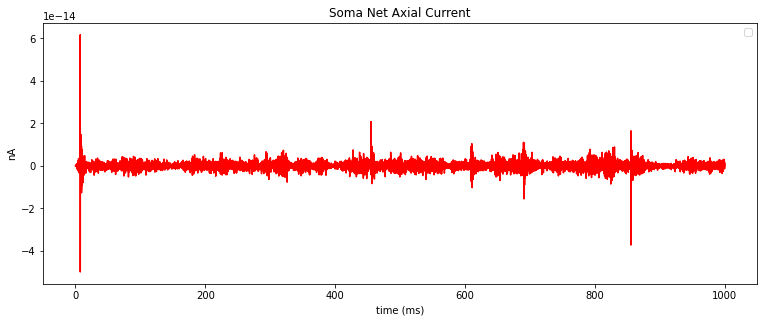

In [ ]:
for probe in [soma]:
  # import pdb; pdb.set_trace()
  plot_net_axial_currentmultiprobe(probes, 'Soma')